### Feature Elimination

#### Imports

In [246]:
from pandas import read_csv
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

#### Import data

In [247]:
url = 'https://goo.gl/bDdBiA'
names = np.array(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
data = read_csv(url, names=names)
array = np.array(data.values)

#### Split to input and output

In [248]:
input = array[:, 0:8]
output = array[:, 8]

#### Feature extraction

In [249]:
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 4)
fit = rfe.fit(input, output) 

#### Analyse the model

In [250]:
features = fit.n_features_
support = fit.support_
ranking = fit.ranking_
print ('Number of features: %d' % fit.n_features_)
print ('Selected features %s' % fit.support_)
print ('Feature ranking %s' % fit.ranking_)

Number of features: 4
Selected features [ True  True False False False  True  True False]
Feature ranking [1 1 2 4 5 1 1 3]


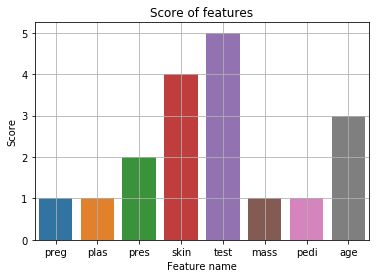

In [251]:
sns.barplot(names[0:8], ranking)
plt.title('Score of features')
plt.xlabel('Feature name')
plt.ylabel('Score')
plt.grid(True)
plt.show()

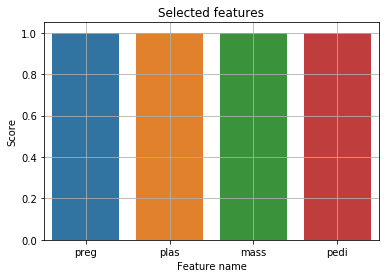

In [252]:
selected_features = names[np.where(support)]
selected_feature_rank = ranking[np.where(support)]
sns.barplot(selected_features, selected_feature_rank)
plt.title('Selected features')
plt.xlabel('Feature name')
plt.ylabel('Score')
plt.grid(True)
plt.show()

### Pricinciple Component Analysis

In [253]:
pca = PCA(n_components=4)
pca_fit = pca.fit(input)
pca_input = pca.transform(input)
print ('Explained Variance %s' % pca_fit.explained_variance_ratio_)
pca_components = pca_fit.components_
print (pca_components)

Explained Variance [0.88854663 0.06159078 0.02579012 0.01308614]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]
 [-4.90459604e-02  1.19830016e-01 -2.62742788e-01  8.84369380e-01
  -6.55503615e-02  1.92801728e-01  2.69908637e-03 -3.01024330e-01]]
